<a href="https://colab.research.google.com/github/padhikari26/Covid-19_ResearchProject/blob/main/Covid_19_Research(final_%3F%3F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-12-914212288.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_vax.index, y=top10_vax['Total Vaccinations'], palette="viridis")


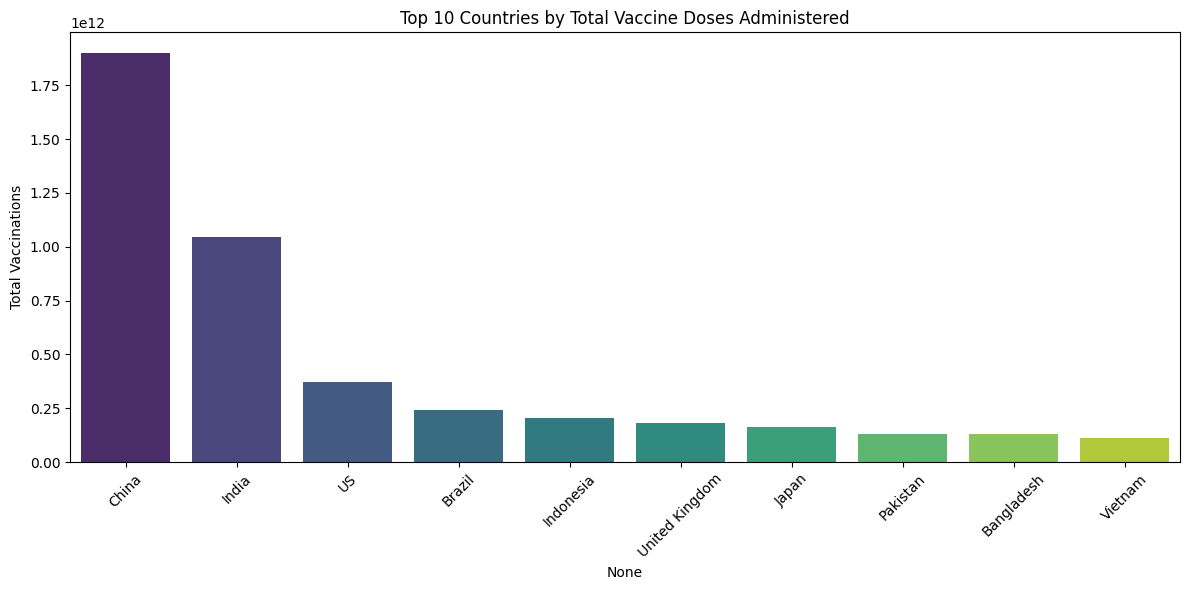

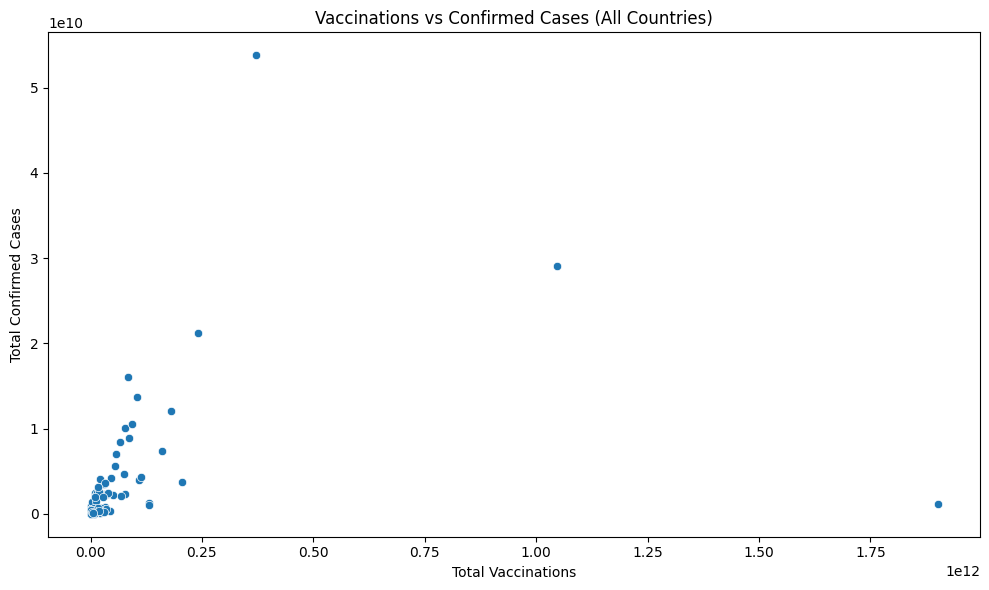

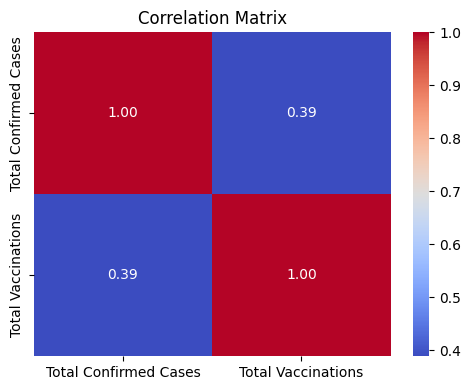

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
vaccine_url = 'https://raw.githubusercontent.com/govex/COVID-19/refs/heads/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv'

confirmed_df = pd.read_csv(confirmed_url)
vaccine_df = pd.read_csv(vaccine_url)

# Clean and aggregate confirmed cases
confirmed_df = confirmed_df.drop(columns=['Lat', 'Long', 'Province/State'])
confirmed_df = confirmed_df.groupby('Country/Region').sum()
total_confirmed = confirmed_df.sum(axis=1)

# Clean and aggregate vaccinations
vaccine_df = vaccine_df.fillna(0)
vaccine_df = vaccine_df.drop(columns=['Long_', 'Province_State'], errors='ignore')
vaccine_df = vaccine_df.groupby('Country_Region').sum(numeric_only=True)
total_vaccines = vaccine_df.sum(axis=1)

# Merge into single DataFrame
combined_df = pd.DataFrame({
    'Total Confirmed Cases': total_confirmed,
    'Total Vaccinations': total_vaccines
}).dropna()

# Top 10 countries by vaccinations
top10_vax = combined_df.sort_values('Total Vaccinations', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10_vax.index, y=top10_vax['Total Vaccinations'], palette="viridis")
plt.title('Top 10 Countries by Total Vaccine Doses Administered')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot showing correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Total Vaccinations', y='Total Confirmed Cases')
plt.title('Vaccinations vs Confirmed Cases (All Countries)')
plt.xlabel('Total Vaccinations')
plt.ylabel('Total Confirmed Cases')
plt.tight_layout()
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-1397674108.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(top['Vaccinated'][i], top[metric][i], country[:4], fontsize=9)


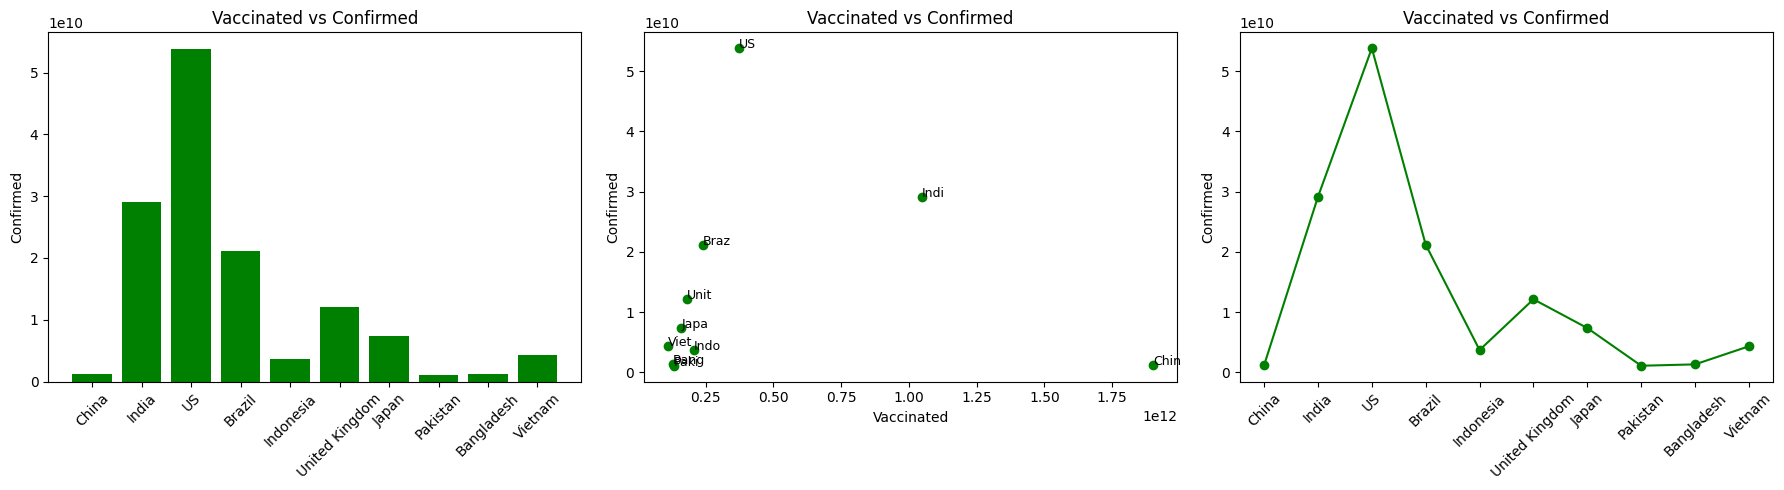

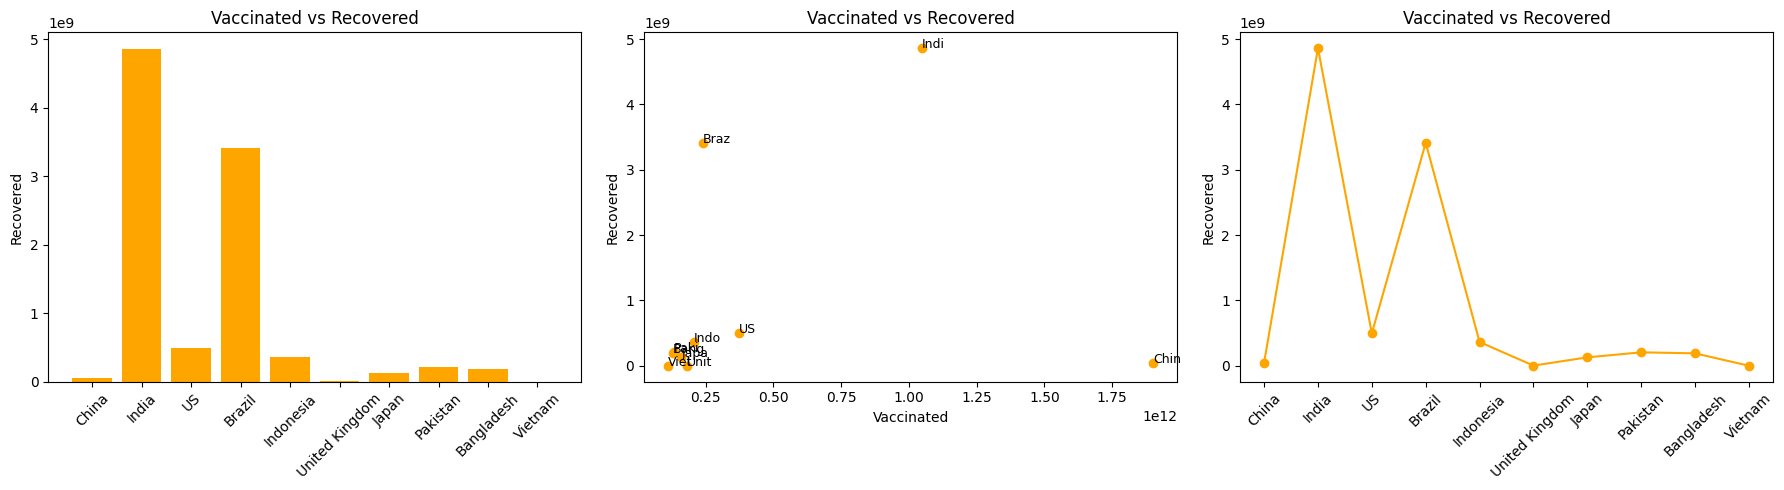

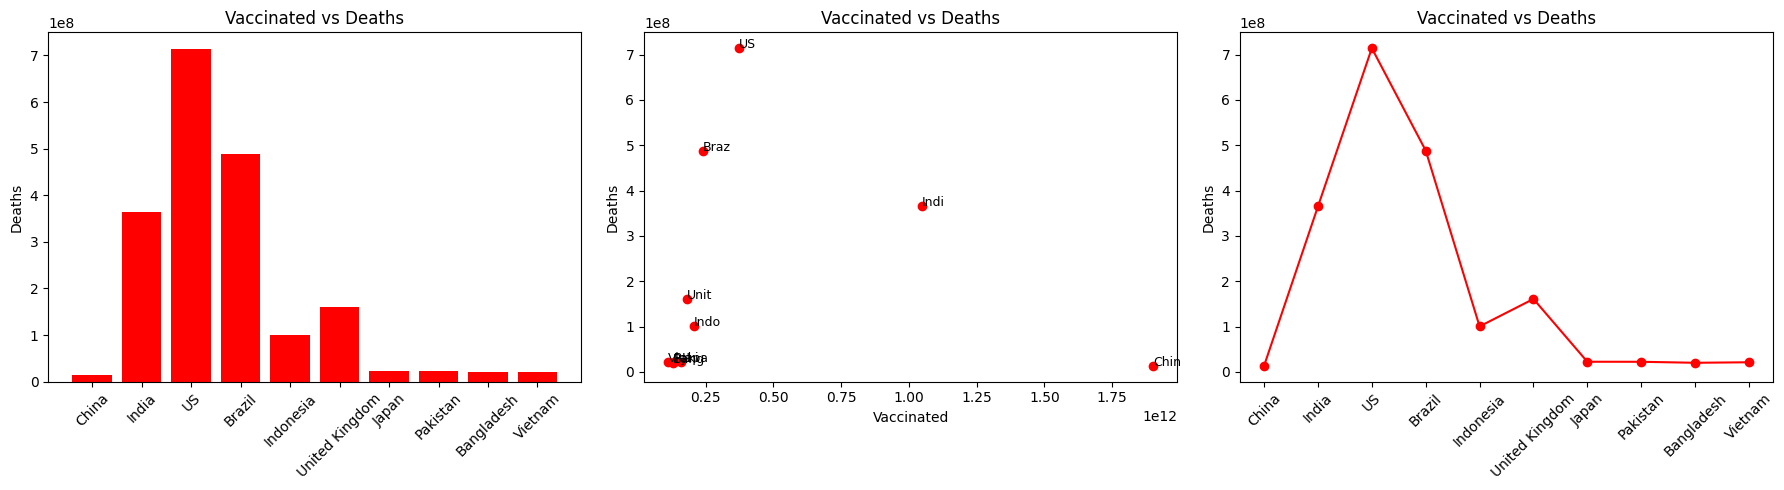

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
vaccine_url = 'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv'

# Load and clean
confirmed = pd.read_csv(confirmed_url).drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum()
deaths = pd.read_csv(deaths_url).drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum()
recovered = pd.read_csv(recovered_url).drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum()

vaccines = pd.read_csv(vaccine_url)
vaccines = vaccines.drop(columns=['Province_State', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key'])
vaccines = vaccines.groupby('Country_Region').sum(numeric_only=True)

# Build summary
summary_df = pd.DataFrame({
    'Confirmed': confirmed.sum(axis=1),
    'Deaths': deaths.sum(axis=1),
    'Recovered': recovered.sum(axis=1),
    'Vaccinated': vaccines.sum(axis=1)
})
summary_df.dropna(inplace=True)
top = summary_df.sort_values(by='Vaccinated', ascending=False).head(10)

# Plot all (Bar, Scatter, Line) for Confirmed, Recovered, Deaths vs Vaccinated
metrics = ['Confirmed', 'Recovered', 'Deaths']
colors = ['green', 'orange', 'red']

for metric, color in zip(metrics, colors):
    plt.figure(figsize=(18, 5))

    # Bar plot
    plt.subplot(1, 3, 1)
    plt.bar(top.index, top[metric], color=color)
    plt.title(f'Vaccinated vs {metric}')
    plt.xticks(rotation=45)
    plt.ylabel(metric)

    # Scatter plot
    plt.subplot(1, 3, 2)
    plt.scatter(top['Vaccinated'], top[metric], color=color)
    for i, country in enumerate(top.index):
        plt.text(top['Vaccinated'][i], top[metric][i], country[:4], fontsize=9)
    plt.title(f'Vaccinated vs {metric}')
    plt.xlabel('Vaccinated')
    plt.ylabel(metric)

    # Line plot
    plt.subplot(1, 3, 3)
    plt.plot(top.index, top[metric], marker='o', color=color)
    plt.title(f'Vaccinated vs {metric}')
    plt.xticks(rotation=45)
    plt.ylabel(metric)

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-14-1229750463.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, top['Vaccinated'][i] * 1.05, f"{int(top['Vaccinated'][i]/1e6)}M", ha='center', fontsize=9, color='blue')
/tmp/ipython-input-14-1229750463.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f"{country}\n{int(top['Vaccinated'][i]/1e6)}M",
/tmp/ipython-input-14-1229750463.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

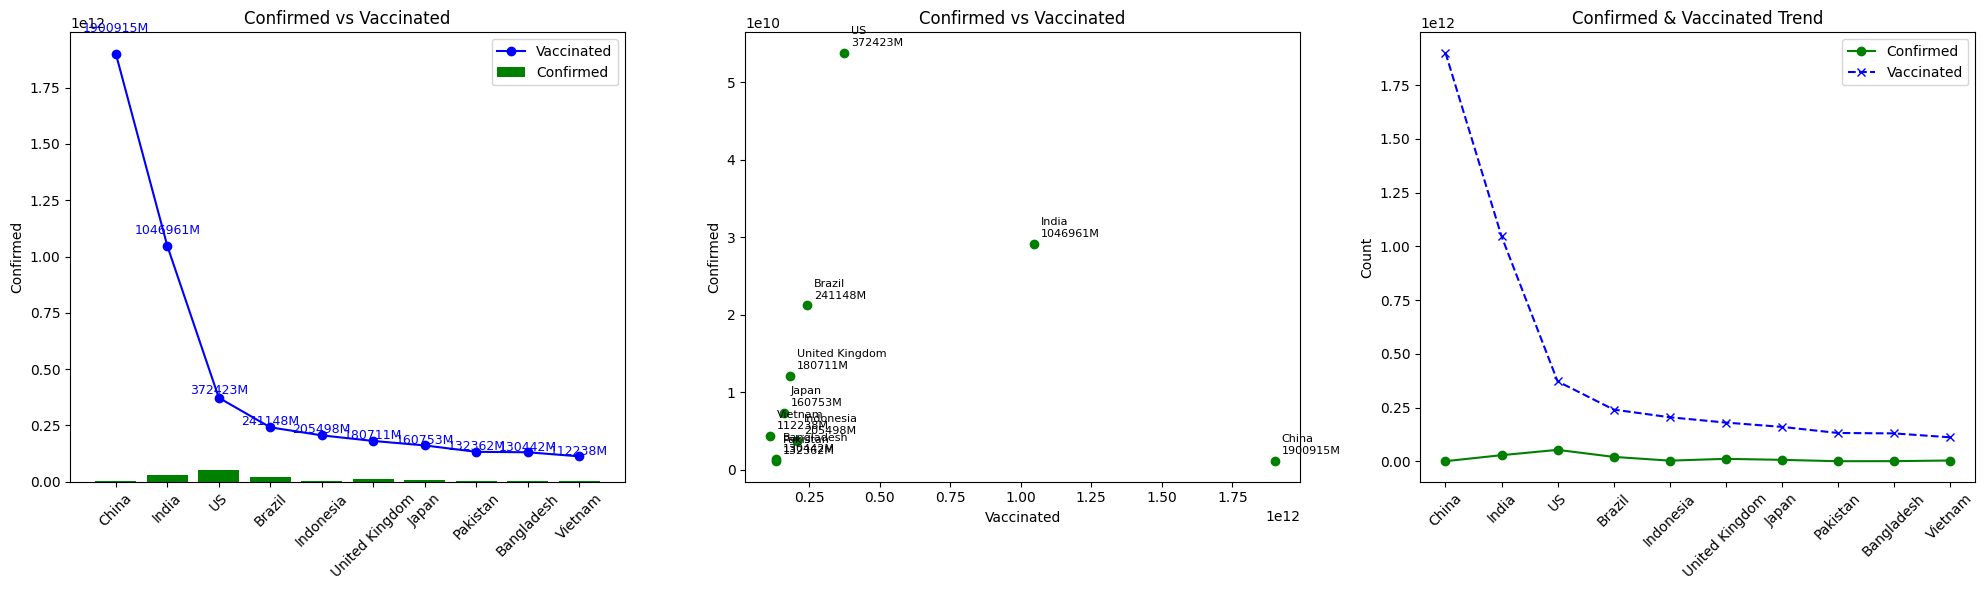

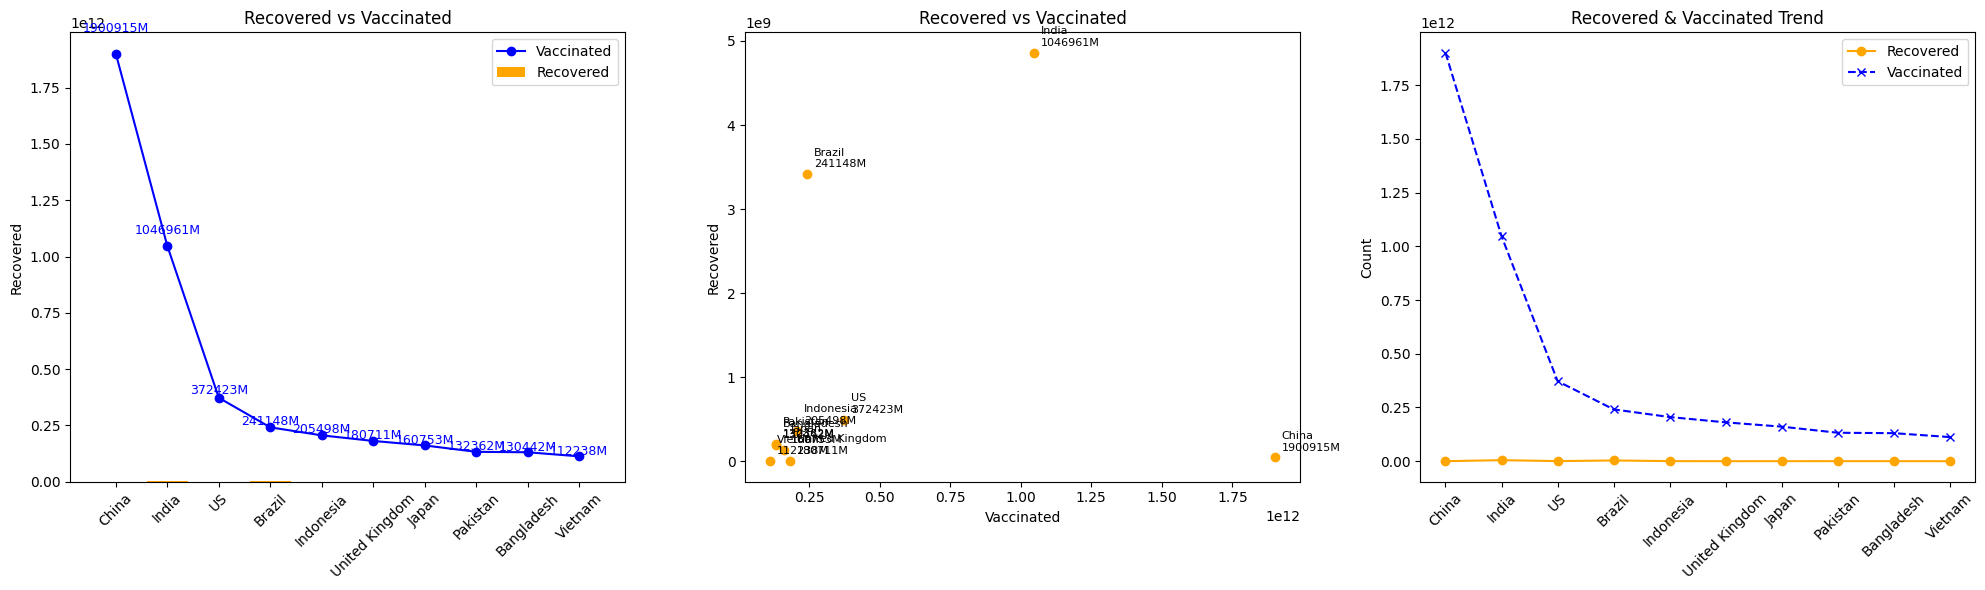

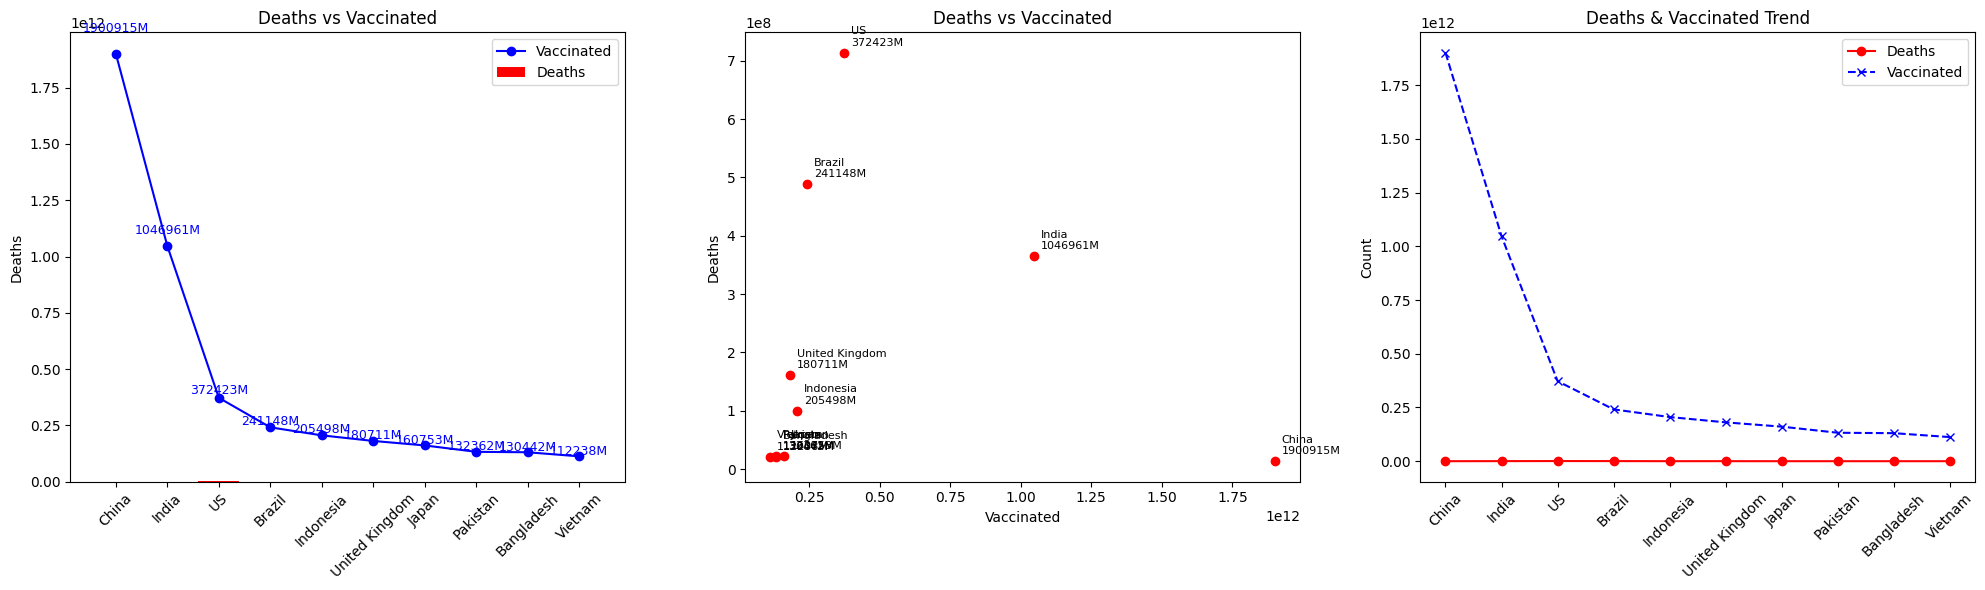

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from GitHub
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
vaccine_url = 'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv'

confirmed = pd.read_csv(confirmed_url).drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum()
deaths = pd.read_csv(deaths_url).drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum()
recovered = pd.read_csv(recovered_url).drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum()
vaccines = pd.read_csv(vaccine_url).drop(columns=['Province_State', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key'])
vaccines = vaccines.groupby('Country_Region').sum(numeric_only=True)

# Build summary
summary = pd.DataFrame({
    'Confirmed': confirmed.sum(axis=1),
    'Deaths': deaths.sum(axis=1),
    'Recovered': recovered.sum(axis=1),
    'Vaccinated': vaccines.sum(axis=1)
})
summary.dropna(inplace=True)
top = summary.sort_values(by='Vaccinated', ascending=False).head(10)

# Plot metrics
metrics = ['Confirmed', 'Recovered', 'Deaths']
colors = ['green', 'orange', 'red']

for metric, color in zip(metrics, colors):
    plt.figure(figsize=(20, 6))

    # Bar chart with vaccination overlay
    plt.subplot(1, 3, 1)
    plt.bar(top.index, top[metric], color=color, label=metric)
    plt.plot(top.index, top['Vaccinated'], color='blue', marker='o', label='Vaccinated')
    for i, country in enumerate(top.index):
        plt.text(i, top['Vaccinated'][i] * 1.05, f"{int(top['Vaccinated'][i]/1e6)}M", ha='center', fontsize=9, color='blue')
    plt.title(f"{metric} vs Vaccinated")
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    plt.legend()

    # Scatter plot with vaccine count labels
    plt.subplot(1, 3, 2)
    plt.scatter(top['Vaccinated'], top[metric], color=color)
    for i, country in enumerate(top.index):
        plt.annotate(f"{country}\n{int(top['Vaccinated'][i]/1e6)}M",
                     (top['Vaccinated'][i], top[metric][i]), textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)
    plt.title(f"{metric} vs Vaccinated")
    plt.xlabel("Vaccinated")
    plt.ylabel(metric)

    # Line chart: Vaccinated vs Metric
    plt.subplot(1, 3, 3)
    plt.plot(top.index, top[metric], marker='o', label=metric, color=color)
    plt.plot(top.index, top['Vaccinated'], marker='x', linestyle='--', label='Vaccinated', color='blue')
    plt.title(f"{metric} & Vaccinated Trend")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.legend()

    plt.tight_layout()
    plt.show()
